In [1]:
import cv2
import numpy as np
from PIL import Image
import re
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('Nature-Image.jpg')
original = cv2.imread('Nature-Image.jpg')

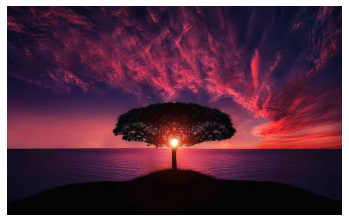

In [3]:
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
height, width, channels = img.shape

In [5]:
def str2bin(string):
    '''funtion to convert string to 8bit binary value ie. String-->ascii-->binary'''
    integer = [ord(s) for s in string]
    binary = [format(num, "08b") for num in integer]
    return binary

In [6]:
def bin2ascii(binary):
    '''function to convert group binary value to ascii value'''
    modstring = ""
    for b in binary:
        binary_int = int(b, 2);
        byte_number = binary_int.bit_length() + 7 // 8
        binary_array = binary_int.to_bytes(byte_number, "big")
        ascii_text = binary_array.decode()
        modstring = modstring+str(ascii_text)
        modstring = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff]', '', modstring)
    return "".join(modstring)

In [7]:
def split2rgb(binary):
    '''function to convert 8 bit binary digit to fit into LSB of each R,G,B in the Image'''
#     ('01000001', '01100011') -->[[01,00,00],[01,01,10]]..
    split = []
    for b in binary:
        split.extend([b[index : index + 2] for index in range(0, len(b), 2)])
    splitMod = [split[i:i + 3] for i in range(0, len(split), 3)]
    return splitMod

In [8]:
def encode2img(img,splitMod):
    '''function to place binary value converted from string into LSB of R,G,B pixel value in the image
    ie. [[1,1,1,1,1,x,x],[1,1,1,1,1,y,y],[1,1,1,1,1,z,z]]'''
    row = 0
    col = 0
    for s in splitMod:
        if len(s)==3:
            x,y,z = s
        elif len(s)==2:
            x,y = s
            z = '0'
        else:
            x=s[0]
            y,z = '0','0'
        while(col<width and row<height):
            aMod,bMod,cMod = [int(format(pixel, "08b")[:-2]+mod,2) for pixel,mod in zip(img[row][col],[x,y,z])]
            img[row][col] = [aMod,bMod,cMod]
            break
        col = col+1
        if col==width-1: 
            row = row+1
            col = 0
    return img, row, col

In [9]:
def showImg(image,title = ""):
    plt.axis("off")
    plt.title(title)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

In [10]:
def decodeFromImg(img,rownum, colnum):
    '''function to decode the encoded string in the image from final row and column value '''
    row = 0
    col = 0
    stringreformation = []
    while(row<=rownum):
        aMod, bMod, cMod = [format(num, "08b")[-2:] for num in img[row][col]]
        stringreformation.extend([aMod,bMod,cMod])
        col = col+1
        if col==width-1 and row<rownum: 
            row = row+1
            col = 0
        if row == rownum and col>colnum:
            break
    return stringreformation

In [11]:
string = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum"
binary = str2bin(string)
img, rownum, colnum = encode2img(img,split2rgb(binary))

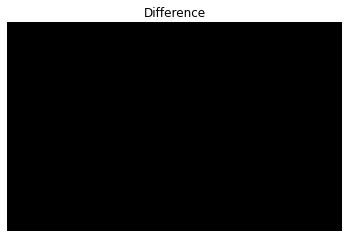

In [12]:
diff = cv2.subtract(original,img)
showImg(diff,title = "Difference")

In [13]:
stringreformation = decodeFromImg(img,rownum,colnum)
reformMod = ["".join(stringreformation[i:i + 4]) for i in range(0, len(stringreformation), 4)]

In [14]:
decodedString = bin2ascii(reformMod)

In [15]:
decodedString

'Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum$'